In [36]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import datetime as dt
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import yfinance as yf
yf.pdr_override()

In [38]:
start = '2021-08-20'
end = '2022-08-20'
symbol = 'AMD'
df = yf.download(symbol, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,104.320000,105.980003,103.989998,104.650002,104.650002,55227600
2021-08-23,105.300003,109.019997,104.860001,108.769997,108.769997,68835300
2021-08-24,109.449997,109.610001,107.279999,107.650002,107.650002,51239300
2021-08-25,108.129997,109.910004,107.449997,108.300003,108.300003,45485500
2021-08-26,108.570000,109.230003,106.839996,107.269997,107.269997,51442500


In [39]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-15,100.510002,101.849998,99.800003,101.010002,101.010002,61327100
2022-08-16,100.839996,101.449997,98.320000,100.199997,100.199997,60220700
2022-08-17,99.260002,99.639999,96.730003,98.269997,98.269997,63735600
2022-08-18,97.739998,101.070000,96.730003,100.440002,100.440002,76059500
2022-08-19,98.669998,99.250000,94.589996,95.949997,95.949997,67167500


In [40]:
monthly = df.copy()

In [41]:
monthly.set_index(monthly.index, inplace=True)
monthly.index = pd.to_datetime(monthly.index)
monthly = monthly.resample('M').mean()
monthly.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-30,96.954500,98.569001,94.155999,95.797500,95.797500,8.595090e+07
2022-05-31,93.610952,96.956191,90.931428,94.271428,94.271428,1.380159e+08
2022-06-30,91.827143,93.647143,89.086668,90.852858,90.852858,9.671368e+07
2022-07-31,81.849500,83.938000,80.476501,82.904499,82.904499,8.166006e+07
2022-08-31,98.485999,100.850666,96.740001,99.324000,99.324000,8.718796e+07


In [42]:
data = monthly['Adj Close']
data

Date
2021-08-31    108.760000
2021-09-30    105.506667
2021-10-31    112.380952
2021-11-30    146.958095
2021-12-31    143.490000
2022-01-31    126.839999
2022-02-28    119.630000
2022-03-31    112.683913
2022-04-30     95.797500
2022-05-31     94.271428
2022-06-30     90.852858
2022-07-31     82.904499
2022-08-31     99.324000
Freq: M, Name: Adj Close, dtype: float64

In [43]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data=[108.76000,105.506667,112.380952,146.958095,143.490000,126.839999,119.630000,112.683913,95.797500,94.271428,90.852858,82.904499]

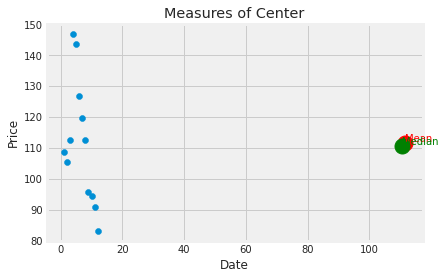

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_title("Measures of Center")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.scatter(months,data)
ax.plot([st.mean(data)], [st.mean(data)], color='r', marker="o", markersize=15)
ax.plot([st.median(data)], [st.median(data)], color='g', marker="o", markersize=15)
plt.annotate("Mean", (st.mean(data), st.mean(data)+0.3), color='r')
plt.annotate("Median", (st.median(data), st.median(data)+0.3), color='g')
#plt.annotate("Mode", (st.mode(data), st.mode(data)+0.3), color='k')
plt.show()